# illustrates the use of the `ensemble` and `analogs` classes

In [1]:
%matplotlib inline

In [2]:
import os 
import sys
import pathlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### import paleopy

In [4]:
from paleopy import ensemble
from paleopy import analogs
from paleopy.plotting import scalar_plot

### determine the current working directory 

In [5]:
cwd = pathlib.Path.cwd() 

In [6]:
print(cwd)

/home/nicolasf/research/PICT_notebooks/notebooks


#### defines the folder where the JSON files are (datasets, and proxies)

In [7]:
djsons = cwd.parent.joinpath('jsons')

In [8]:
pjsons = djsons.joinpath('proxies')

In [9]:
djsons.mkdir(parents=True, exist_ok=True) 

In [10]:
pjsons.mkdir(parents=True, exist_ok=True) 

### defines the name of the directory (contained in djsons / proxies) where the ensemble of proxies is located 

In [11]:
ens_dir_name = 'LIANZSWP'

In [12]:
ens_jsons = pjsons.joinpath(ens_dir_name)

In [13]:
if not ens_jsons.exists(): 
    print(f"ERROR, the directory {ens_jsons} doest not exists")

### List of proxies that constitutes the ensemble 

In [14]:
ls -ltr {ens_jsons}

total 96
-rw-r--r-- 1 nicolasf nicolasf 800 Jun  6 14:37  Rarotonga.json
-rw-r--r-- 1 nicolasf nicolasf 798 Jun  6 14:37  Amedee.json
-rw-r--r-- 1 nicolasf nicolasf 806 Jun  6 14:37  Oroko.json
-rw-r--r-- 1 nicolasf nicolasf 809 Jun  6 14:37  Greenlaw.json
-rw-r--r-- 1 nicolasf nicolasf 804 Jun  6 14:37  Crow.json
-rw-r--r-- 1 nicolasf nicolasf 808 Jun  6 14:37  Cameron.json
-rw-r--r-- 1 nicolasf nicolasf 805 Jun  6 14:37  Avoca.json
-rw-r--r-- 1 nicolasf nicolasf 809 Jun  6 14:37  Temple.json
-rw-r--r-- 1 nicolasf nicolasf 810 Jun  6 14:37  Hopkins.json
-rw-r--r-- 1 nicolasf nicolasf 810 Jun  6 14:37  Turnbull.json
-rw-r--r-- 1 nicolasf nicolasf 802 Jun  6 14:37  Jollie.json
-rw-r--r-- 1 nicolasf nicolasf 806 Jun  6 14:37  Cass.json
-rw-r--r-- 1 nicolasf nicolasf 805 Jun  6 14:37  Caples.json
-rw-r--r-- 1 nicolasf nicolasf 806 Jun  6 14:37  Fraser.json
-rw-r--r-- 1 nicolasf nicolasf 807 Jun  6 14:37  Frances.json
-rw-r--r-- 1 nicolasf nicolasf 803 Jun  6 14:37  Hunter.json
-rw-r--r-- 

### instantiates an `ensemble` class, need to pass the season explicitely, so that we can check the consitency between the proxy definitions 

In [15]:
ens = ensemble(pjsons=ens_jsons, season='DJF')

### calculates the analog composite in the ERSST SSTs, uses all repeated years (the default) which 'weights' the composite towards the analog seasons common between the proxies

In [16]:
sst = analogs(ens, 'ersst', 'sst').composite()

### plots

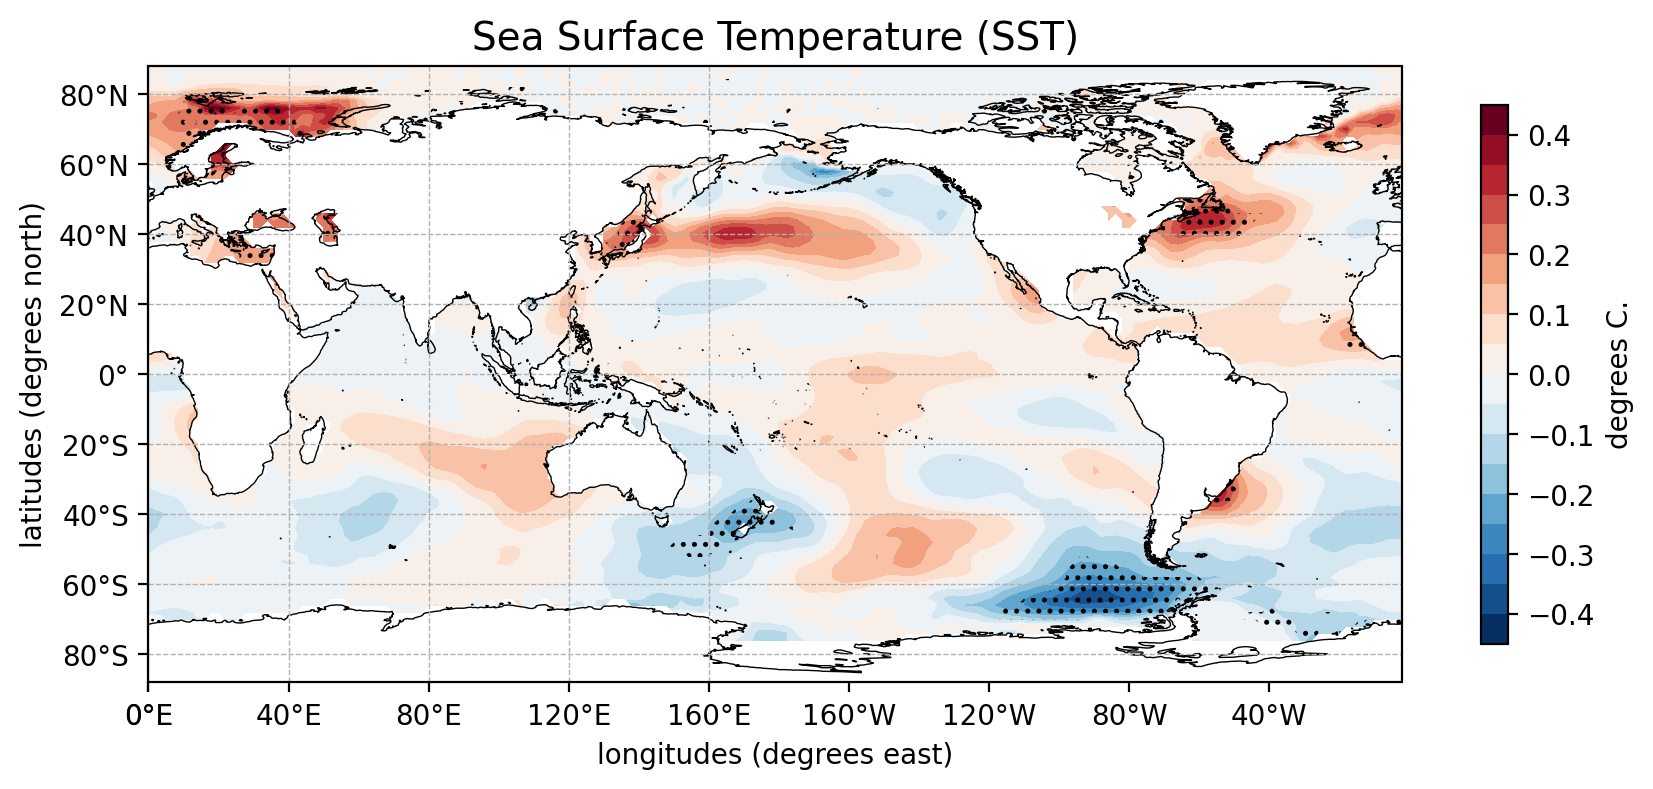

In [17]:
f, ax = scalar_plot(sst).plot()

### same as above but for the NCEP geopotential at 1000 hPa

In [18]:
hgt_1000 = analogs(ens, 'ncep', 'hgt_1000').composite()

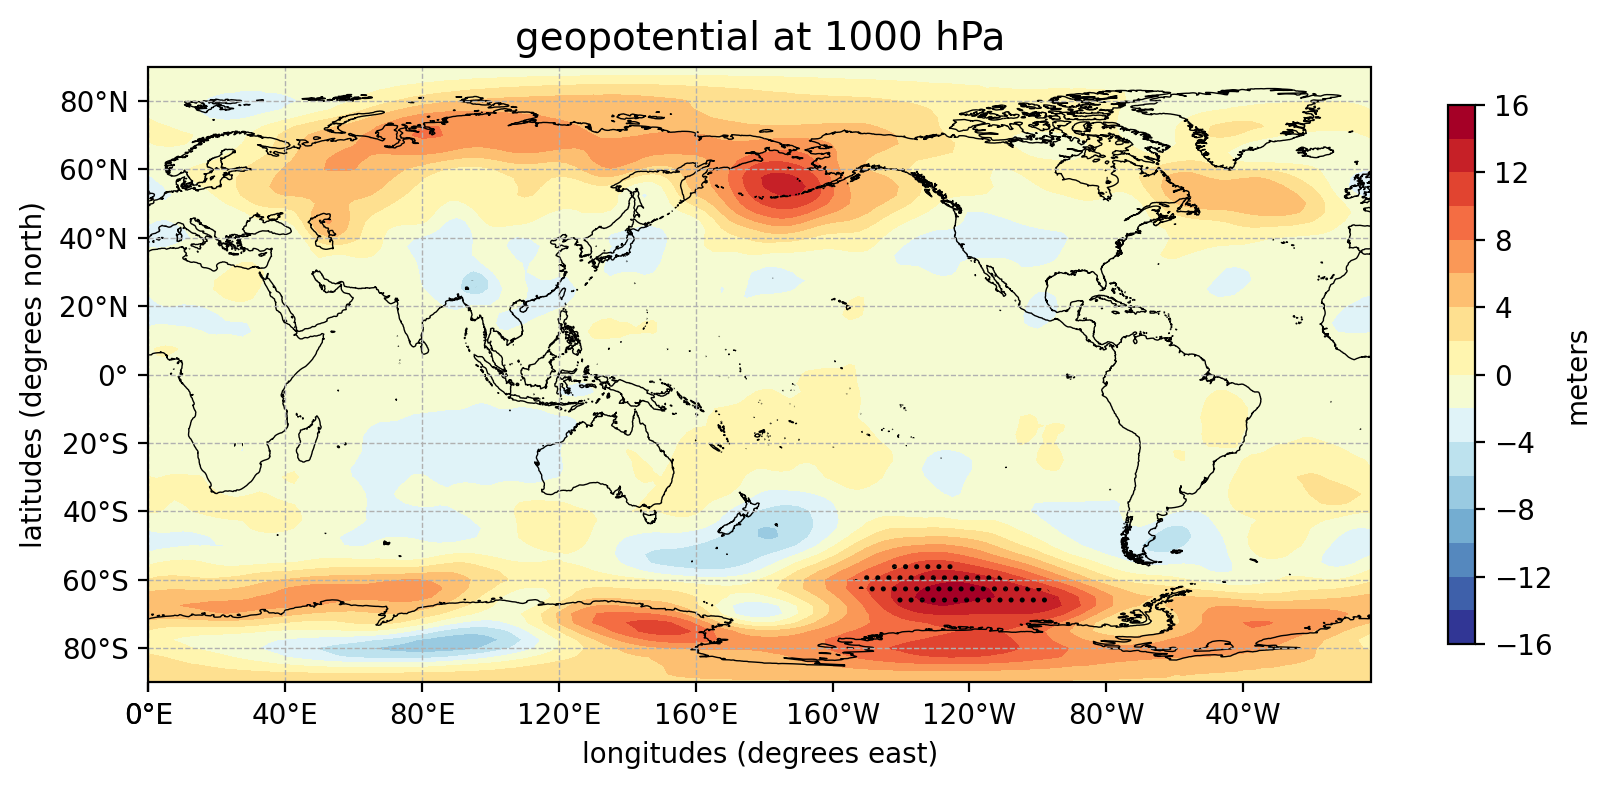

In [19]:
f, ax = scalar_plot(hgt_1000).plot()

### same as above but specifying a south polar stereographic projection, in this case it is advisable to wrap the longitudes 

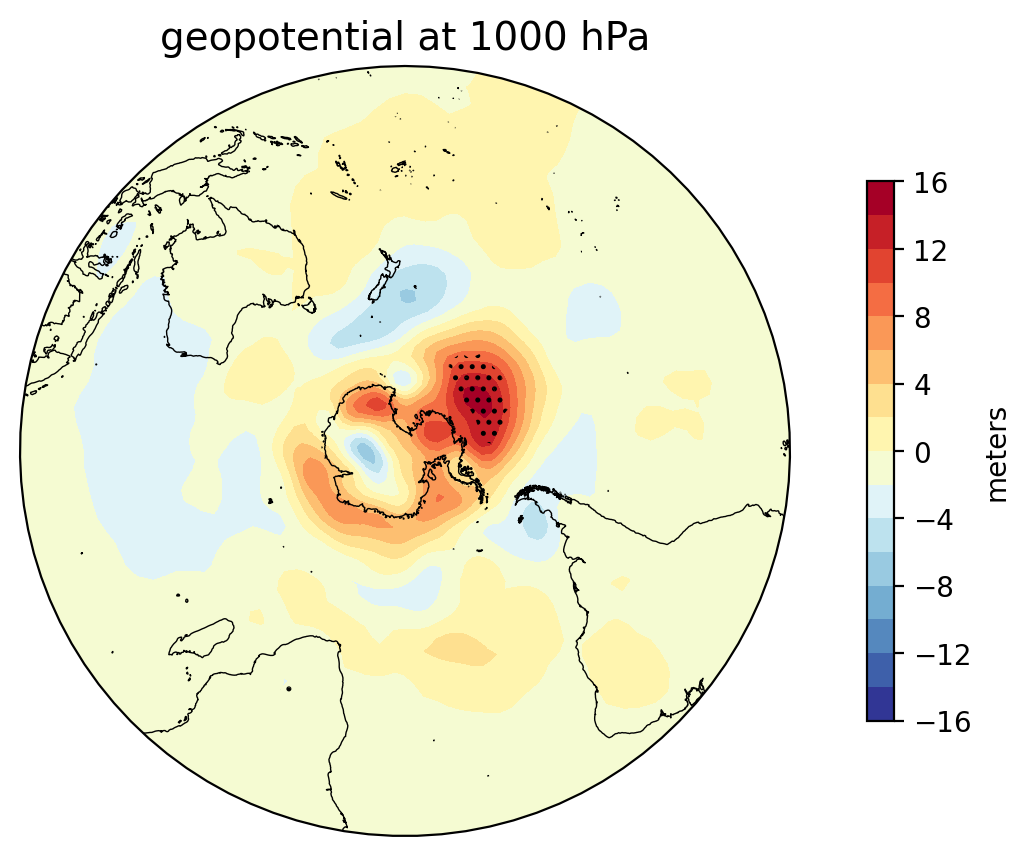

In [20]:
f, ax = scalar_plot(hgt_1000, proj='spstere').plot(wrap_longitudes=True)

In [21]:
compos = analogs(ens, 'agcd', 'Rain')

In [22]:
compos.composite()

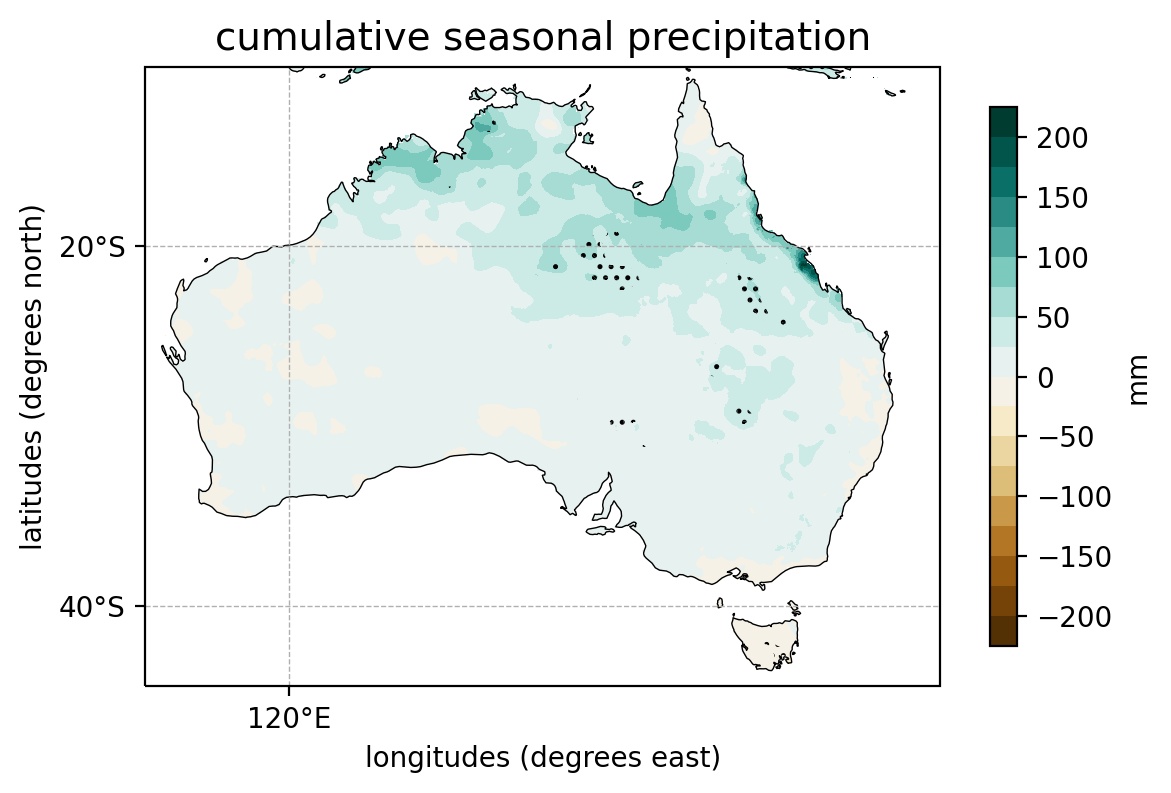

In [23]:
f, ax = scalar_plot(compos).plot(mask=True)